<a href="https://colab.research.google.com/github/swilsonmfc/nlp/blob/master/BagOfWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOW
* Read in a corpus of text
* Convert to a Bag of Words
  * Word : Frequency
* Complete task using a variety of mechanisms
  * Python
  * DefaultDict
  * CountVectorizer
  * FreqDist
  * Gensim
  * Spacy
  * TextBlob
* Review Common Preprocessing to BOW
* Apply TF-IDF

![](https://miro.medium.com/max/600/0*JpqZhCNsQ_OGaRkB.jpg)


# Setup

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from collections import Counter

import nltk
import nltk.stem
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

from gensim import models
from gensim import corpora

import spacy

from textblob import TextBlob

# Data

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
hamlet       = gutenberg.words('shakespeare-hamlet.txt')
hamlet_raw   = gutenberg.raw('shakespeare-hamlet.txt')
hamlet_sents = gutenberg.sents('shakespeare-hamlet.txt')
len(hamlet)

37360

In [6]:
counter = 0
for word in hamlet:
  print(word)
  counter += 1
  if counter > 20:
    break

[
The
Tragedie
of
Hamlet
by
William
Shakespeare
1599
]
Actus
Primus
.
Scoena
Prima
.
Enter
Barnardo
and
Francisco
two


# Bag of Words

## Dictionary
* Loop through the words
* Each time we see a word increment the counter in the dictionary

In [7]:
diy_bow = {}
for word in hamlet:
  diy_bow.setdefault(word, 0) 
  diy_bow[word] += 1

print(f'There are {len(hamlet):,} tokens in Hamlet')
print(f'There are {len(diy_bow):,} unique tokens in Hamlet')

There are 37,360 tokens in Hamlet
There are 5,447 unique tokens in Hamlet


## DefaultDict

In [8]:
frequency = defaultdict(int)
for token in hamlet:
  frequency[token] += 1

print(f'There are {len(hamlet):,} tokens in Hamlet')
print(f'There are {len(frequency):,} unique tokens in Hamlet')

There are 37,360 tokens in Hamlet
There are 5,447 unique tokens in Hamlet


## FreqDist
* FreqDist is a subset of Dictionary
* To get the unigrams in the dictionary, cast it to dict
* Helper class in NLTK

In [9]:
fdist_manual = FreqDist()
for word in hamlet:
  fdist_manual[word] += 1

fdist = FreqDist([word for word in hamlet])

print(f'There are {len(hamlet):,} tokens in Hamlet')
print(f'There are {len(fdist):,} unique tokens in Hamlet')

There are 37,360 tokens in Hamlet
There are 5,447 unique tokens in Hamlet


In [10]:
d = dict(fdist)
freq = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
print(freq[0:20])

[(',', 2892), ('.', 1886), ('the', 860), ("'", 729), ('and', 606), ('of', 576), ('to', 576), (':', 565), ('I', 553), ('you', 479), ('?', 459), ('a', 449), ('my', 435), ('in', 359), ('it', 354), ('Ham', 337), ('is', 304), (';', 298), ('not', 286), ('his', 266)]


## CountVectorizer
* Class in sklearn
* Can build NGrams
* Handles some preprocessing (lower)
* Has code for word boundaries

In [11]:
count_vec = CountVectorizer()
count_vec.fit_transform(hamlet)
print(f'There are {len(count_vec.get_feature_names()):,} unique tokens in Hamlet')

There are 4,688 unique tokens in Hamlet


In [12]:
count_vec = CountVectorizer(lowercase=False)
count_vec.fit_transform(hamlet)
print(f'There are {len(count_vec.get_feature_names()):,} unique tokens in Hamlet')

There are 5,411 unique tokens in Hamlet


In [13]:
diffs = set.difference(set(diy_bow.keys()), count_vec.get_feature_names())
diffs

{'!',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '1',
 ':',
 ':)',
 ';',
 '?',
 'A',
 'E',
 'I',
 'K',
 'L',
 'O',
 'S',
 'T',
 'Y',
 '[',
 ']',
 '].',
 'a',
 'd',
 'e',
 'i',
 'l',
 'm',
 'n',
 'o',
 's',
 't',
 'y'}

## CountVectorizer - NGrams
* Bag of Words = BOW
* Bag of N Grams = ?

In [14]:
count_ngram_vec = CountVectorizer(ngram_range=(1, 2))
fitted = count_ngram_vec.fit_transform([hamlet_raw])

print(f'There are {len(count_ngram_vec.get_feature_names()):,} unique Uni & Bi Grams in Hamlet')

There are 25,506 unique Uni & Bi Grams in Hamlet


In [15]:
most = fitted.toarray().argmax()
count_ngram_vec.get_feature_names()[most]

'the'

## Gensim
* It expects a list of documents, where each document is a list of tokens

In [16]:
words = [word for word in hamlet]
gensim_dict = corpora.Dictionary([words])

print(f'There are {len(hamlet):,} tokens in Hamlet')
print(f'There are {len(gensim_dict):,} unique tokens in Hamlet')

print(f'There was {gensim_dict.num_docs:,} documents loaded.')
print(f'There was {gensim_dict.num_nnz:,} unique tokens loaded.')
print(f'There was {gensim_dict.num_pos:,} words loaded.')

There are 37,360 tokens in Hamlet
There are 5,447 unique tokens in Hamlet
There was 1 documents loaded.
There was 5,447 unique tokens loaded.
There was 37,360 words loaded.


In [17]:
bow = gensim_dict.doc2bow(document=hamlet)
[(gensim_dict.get(id), freq) for id, freq in bow][0:20]

[('!', 17),
 ('&', 25),
 ("'", 729),
 ('(', 45),
 (')', 43),
 (',', 2892),
 ('-', 117),
 ('.', 1886),
 ('1', 4),
 ('1599', 1),
 (':', 565),
 (':)', 1),
 (';', 298),
 ('?', 459),
 ('A', 62),
 ('Aboord', 1),
 ('About', 3),
 ('Abridgements', 1),
 ('Absent', 1),
 ('Abstracts', 1)]

## SpaCy
* Operates against a raw text string
* Applies a pipeline to the processing

In [18]:
nlp = spacy.load("en")

In [19]:
spacy_doc = nlp(hamlet_raw)

print(f'Spacy identified {spacy_doc.vocab.length:,} tokens')

Spacy identified 5,931 tokens


In [20]:
words = [token.text for token in spacy_doc]
word_freq = Counter(words)
common_words = word_freq.most_common(20)
print (common_words)

[(',', 2892), ('\n', 2752), ('.', 1846), ('the', 860), ('\n\n   ', 734), ('and', 605), ('of', 576), ('to', 574), (':', 566), ('I', 549), ('you', 474), ('?', 459), ('a', 447), ('my', 435), ('it', 354), ('in', 348), ('Ham', 337), ('not', 313), (';', 298), ('is', 292)]


## TextBlob
* Operates against a raw string
* Applies a tokenizer and other components to the text

In [21]:
tb = TextBlob(hamlet_raw)

In [22]:
tb.word_counts

defaultdict(int,
            {'the': 993,
             'tragedie': 4,
             'of': 610,
             'hamlet': 100,
             'by': 105,
             'william': 1,
             'shakespeare': 1,
             '1599': 1,
             'actus': 2,
             'primus': 1,
             'scoena': 1,
             'prima': 1,
             'enter': 85,
             'barnardo': 8,
             'and': 862,
             'francisco': 2,
             'two': 21,
             'centinels': 1,
             'who': 42,
             's': 121,
             'there': 92,
             'fran': 8,
             'nay': 26,
             'answer': 9,
             'me': 228,
             'stand': 15,
             'vnfold': 3,
             'your': 253,
             'selfe': 67,
             'bar': 7,
             'long': 17,
             'liue': 14,
             'king': 172,
             'he': 202,
             'you': 522,
             'come': 104,
             'most': 77,
             'carefully': 1,
      

## Challenges / Limitations
* Sparsity of BOW
* Lost information of text order

# Distance

## Cosine Similarity

![](https://neo4j.com/docs/graph-data-science/current/_images/cosine-similarity.png)

In [23]:
# Cosine similarity of OHE vectors is 0 if different, 1 if same
X = [1, 0]
Y = [0, 1]
cos = 1 - cosine(X, Y)
cos

0.0

In [24]:
# Cosine similarity is unaffected by magnitude (TF)
X = [.5, .5]
Y1 = [5, 5]
Y2 = [50, 50]
cos1 = 1 - cosine(X, Y1)
cos2 = 1 - cosine(X, Y2)
cos1, cos2

(1.0, 1.0)

In [25]:
# Minimum similarity is -1 if vectors are opposite
X = [1, 1]
Y = [-1, -1]
cos = 1 - cosine(X, Y)
cos

-1.0

In [26]:
# Cosine Similarity can run in multiple dimensions
X = [1, 2, 3, 4, 5]
Y = [5, 4, 3, 2, 1]
cos = 1 - cosine(X, Y)
cos

0.6363636363636364

## Euclidean

In [27]:
# Euclidean distance the same for OHE vectors = Sqrt(2)
X = [1, 0]
Y = [0, 1]
euc = euclidean(X, Y)
euc

1.4142135623730951

In [28]:
# Euclidean distance is affected by magnitude (TF)
X = [.5, .5]
Y1 = [5, 5]
Y2 = [50, 50]
euc1 = euclidean(X, Y1)
euc2 = euclidean(X, Y2)
euc1, euc2

(6.363961030678928, 70.0035713374682)

## Comparison

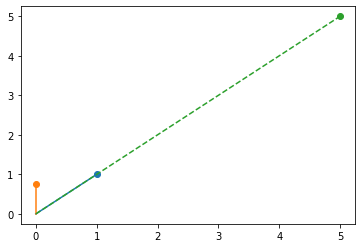

In [29]:
X = [1, 1]
Y = [0, .75]
Z = [5, 5]

plt.scatter(X[0], X[1])
plt.scatter(Y[0], Y[1])
plt.scatter(Z[0], Z[1])

plt.plot([0, X[0]], [0, X[1]])
plt.plot([0, Y[0]], [0, Y[1]])
plt.plot([0, Z[0]], [0, Z[1]], linestyle='--')

In [30]:
 print('X Compared to Y')
print(X, Y)
print('Euclidean', euclidean(X, Y))
print('Cosine', 1 - cosine(X, Y))

X Compared to Y
[1, 1] [0, 0.75]
Euclidean 1.0307764064044151
Cosine 0.7071067811865476


In [31]:
print('X Compared to Z')
print(X, Z)
print('Euclidean', euclidean(X, Z))
print('Cosine', 1 - cosine(X, Z))

X Compared to Z
[1, 1] [5, 5]
Euclidean 5.656854249492381
Cosine 1.0


* X to Y has lower euclidean distance
* X to Y has lower cosine similarity
* What leads to higher "magnitudes" in text?

## Example

In [32]:
texts = ['shakespeare-hamlet.txt',
         'shakespeare-macbeth.txt',
         'melville-moby_dick.txt',
         'milton-paradise.txt']

raw = [gutenberg.raw(t) for t in texts]

In [33]:
# Fit
cv = CountVectorizer()
cv.fit(raw)
len(cv.get_feature_names())

24182

In [34]:
# Transform
vectorized = cv.transform(raw)
bow = vectorized.toarray()

In [35]:
# Each document has the same size = vocab
[len(doc) for doc in bow]

[24182, 24182, 24182, 24182]

In [36]:
# How many unique words are there in each
np.count_nonzero(bow, axis=1)

array([ 4688,  3436, 17110,  8971])

In [37]:
# Top word 
top = np.argmax(bow, axis=1)
[cv.get_feature_names()[i] for i in top]

['the', 'the', 'the', 'and']

In [38]:
# Is Hamlet more of a Melville or a Milton?
shake_hamlet, shake_macbeth, melville, milton = bow.squeeze()

In [39]:
# Euclidean
# Shakespeare - Shakespeare close
# Hamlet is more Milton (least distance)
ham_to_macbeth  = euclidean(shake_hamlet, shake_macbeth)
ham_to_melville = euclidean(shake_hamlet, melville)
ham_to_milton   = euclidean(shake_hamlet, milton)
print(ham_to_macbeth, ham_to_melville, ham_to_milton)

1142.7458160063418 18487.17893568405 4808.8941556245545


In [40]:
# Cosine Similarity
# Shakespeare - Shakespeare close
# Barely, Hamlet is more Milton (highest similarity)
ham_to_macbeth  = 1 - cosine(shake_hamlet, shake_macbeth)
ham_to_melville = 1 - cosine(shake_hamlet, melville)
ham_to_milton   = 1 - cosine(shake_hamlet, milton)
print(ham_to_macbeth, ham_to_melville, ham_to_milton)

0.9462232228410759 0.8418050311907488 0.8426230205421135


In [41]:
# Top 10 Words - Something Foul - These words aren't very discriminitive
ind = np.argpartition(bow, -10, axis=1)
top = [row[-10:] for row in ind]
[cv.get_feature_names()[i] for row in top for i in row]

['ham',
 'that',
 'in',
 'my',
 'the',
 'you',
 'it',
 'to',
 'and',
 'of',
 'not',
 'is',
 'in',
 'my',
 'you',
 'that',
 'to',
 'the',
 'and',
 'of',
 'but',
 'he',
 'it',
 'his',
 'to',
 'that',
 'in',
 'and',
 'the',
 'of',
 'all',
 'that',
 'or',
 'with',
 'his',
 'in',
 'the',
 'and',
 'to',
 'of']

# Preprocessing
* Common transformations to improve the bag of words
* This helps "normalize" the data
* But we again, will be losing information
* To illustrate, we'll use build on CountVectorizer

## Lowercase

In [42]:
# Count vectorizer applies lower casing to True by default
count_vec = CountVectorizer(lowercase=True)

## Punctuation

In [43]:
# Count vectorizer applies a regular expression around words 
# This eliminates punctuation r”(?u)\b\w\w+\b”
# How could we include punctuation or adjust this?
count_vec = CountVectorizer(token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'")
bow = count_vec.fit_transform([hamlet_raw])
print(f'There are {len(count_vec.get_feature_names()):,} unique tokens in Hamlet')

There are 4,691 unique tokens in Hamlet


In [44]:
df = pd.DataFrame(bow.toarray(), columns=count_vec.get_feature_names())
df

,!,',1599,?,abhominably,abhorred,abilitie,aboord,aboue,about,abridgements,abroad,absent,absolute,abstinence,abstracts,absurd,abus,abuse,abuses,accent,accepts,accesse,accident,accidentall,accord,according,account,accounted,accurst,accuse,acquaint,acquire,acquittance,act,acte,acted,acting,action,actions,...,wrights,wring,wringing,wrinkled,wrist,writ,write,writers,wrong,wrote,wrought,yases,yaughan,yawne,ye,yea,yeare,yeares,years,yeeld,yeelding,yeomans,yes,yesterday,yesternight,yesty,yet,yon,yond,yonder,yong,yonger,yorick,yoricks,you,young,your,yours,youth,zone
0,17,729,1,459,1,1,1,3,4,19,1,1,1,1,1,1,2,1,1,1,2,1,1,3,1,1,2,1,1,1,1,1,1,1,9,4,1,1,10,1,...,1,1,1,1,1,6,1,1,8,2,1,1,1,1,11,4,5,2,1,1,1,1,5,1,1,1,37,1,1,1,8,1,1,1,527,9,253,6,14,1


In [45]:
# Top 10 words - With punctuation
top = np.argsort(-df.values, axis=1)[:, : 10]
result = pd.DataFrame(df.columns[top], index=df.index)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9
0,the,and,',to,of,you,my,?,it,in


## Stopwords

In [46]:
# Bag of words for Hamlet
count_vec = CountVectorizer()
bow = count_vec.fit_transform([hamlet_raw])
print(f'There are {len(count_vec.get_feature_names()):,} unique tokens in Hamlet')

There are 4,688 unique tokens in Hamlet


In [47]:
# To a DataFrame
df = pd.DataFrame(bow.toarray(), columns=count_vec.get_feature_names())
df

,1599,abhominably,abhorred,abilitie,aboord,aboue,about,abridgements,abroad,absent,absolute,abstinence,abstracts,absurd,abus,abuse,abuses,accent,accepts,accesse,accident,accidentall,accord,according,account,accounted,accurst,accuse,acquaint,acquire,acquittance,act,acte,acted,acting,action,actions,actiuely,actor,actors,...,wrights,wring,wringing,wrinkled,wrist,writ,write,writers,wrong,wrote,wrought,yases,yaughan,yawne,ye,yea,yeare,yeares,years,yeeld,yeelding,yeomans,yes,yesterday,yesternight,yesty,yet,yon,yond,yonder,yong,yonger,yorick,yoricks,you,young,your,yours,youth,zone
0,1,1,1,1,3,4,19,1,1,1,1,1,1,2,1,1,1,2,1,1,3,1,1,2,1,1,1,1,1,1,1,9,4,1,1,10,1,1,3,2,...,1,1,1,1,1,6,1,1,8,2,1,1,1,1,11,4,5,2,1,1,1,1,5,1,1,1,37,1,1,1,8,1,1,1,527,9,253,6,14,1


In [48]:
# Top 10 words
top = np.argsort(-df.values, axis=1)[:, : 10]
result = pd.DataFrame(df.columns[top], index=df.index)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9
0,the,and,to,of,you,my,it,in,that,ham


In [49]:
# Apply stop words
stop = set(stopwords.words('english'))
count_vec = CountVectorizer(stop_words=stop)
bow_stop = count_vec.fit_transform([hamlet_raw])
print(f'There are {len(count_vec.get_feature_names()):,} unique tokens in Hamlet')

There are 4,587 unique tokens in Hamlet


In [50]:
# To a DataFrame
df = pd.DataFrame(bow_stop.toarray(), columns=count_vec.get_feature_names())
df

,1599,abhominably,abhorred,abilitie,aboord,aboue,abridgements,abroad,absent,absolute,abstinence,abstracts,absurd,abus,abuse,abuses,accent,accepts,accesse,accident,accidentall,accord,according,account,accounted,accurst,accuse,acquaint,acquire,acquittance,act,acte,acted,acting,action,actions,actiuely,actor,actors,acts,...,wrath,wretch,wretched,wrights,wring,wringing,wrinkled,wrist,writ,write,writers,wrong,wrote,wrought,yases,yaughan,yawne,ye,yea,yeare,yeares,years,yeeld,yeelding,yeomans,yes,yesterday,yesternight,yesty,yet,yon,yond,yonder,yong,yonger,yorick,yoricks,young,youth,zone
0,1,1,1,1,3,4,1,1,1,1,1,1,2,1,1,1,2,1,1,3,1,1,2,1,1,1,1,1,1,1,9,4,1,1,10,1,1,3,2,2,...,1,3,4,1,1,1,1,1,6,1,1,8,2,1,1,1,1,11,4,5,2,1,1,1,1,5,1,1,1,37,1,1,1,8,1,1,1,9,14,1


In [51]:
# Top 10 words
top = np.argsort(-df.values, axis=1)[:, : 10]
result = pd.DataFrame(df.columns[top], index=df.index)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9
0,ham,lord,haue,king,shall,thou,come,let,hamlet,good


## Stemming
* Similar meaning different tokens
  * Happy and Happier
  * Run and Runs
  * Think cosine difference!
* With preprocessing and bag of words we have to adjust the text
* PorterStemmer is a popular approach
  * Works on the English Language
  * https://vijinimallawaarachchi.com/2017/05/09/porter-stemming-algorithm/
* Stemming isn't directly supported in CountVectorizer
* We can override the analyzer (specifically, we build one that stems)

In [52]:
porter_stemmer = nltk.stem.PorterStemmer()
class PorterCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(PorterCountVectorizer, self).build_analyzer()
        return lambda doc: ([porter_stemmer.stem(w) for w in analyzer(doc)])

In [53]:
# Note:  We normally see 4,688 tokens
count_vec = PorterCountVectorizer()
bow_stem = count_vec.fit_transform([hamlet_raw])
print(f'There are {len(count_vec.get_feature_names()):,} unique tokens in Hamlet')

There are 3,732 unique tokens in Hamlet


In [54]:
# To a DataFrame
df = pd.DataFrame(bow_stem.toarray(), columns=count_vec.get_feature_names())
df

,1599,abhomin,abhor,abiliti,aboord,abou,about,abridg,abroad,absent,absolut,abstin,abstract,absurd,abu,abus,accent,accept,access,accid,accidental,accord,account,accurst,accus,acquaint,acquir,acquitt,act,action,actiu,actor,actu,adai,adam,addict,addit,address,adher,adieu,...,wot,would,wouldest,wound,wrack,wrath,wretch,wright,wring,wrinkl,wrist,writ,write,writer,wrong,wrote,wrought,yase,yaughan,yawn,ye,yea,year,yeeld,yeoman,yesterday,yesternight,yesti,yet,yon,yond,yonder,yong,yonger,yorick,you,young,your,youth,zone
0,1,1,1,1,3,4,19,1,1,1,1,1,1,2,1,2,2,1,1,3,1,3,2,1,1,1,1,1,17,11,1,5,2,1,2,1,1,1,1,1,...,1,73,2,2,1,1,7,1,2,1,1,6,1,1,8,2,1,1,1,1,16,4,8,2,1,1,1,1,37,1,1,1,8,1,2,527,9,259,14,1


In [55]:
# Example words (Notice: nois, fals, loos, morn)
top = np.argsort(-df.values, axis=1)[:, 500 : 520]
result = pd.DataFrame(df.columns[top], index=df.index)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,mouth,morn,shame,sorrow,nois,bad,fals,sure,loos,crown,ill,bar,list,beard,lack,distract,beast,gaue,wretch,prison


# TF-IDF
![](https://miro.medium.com/max/1200/1*V9ac4hLVyms79jl65Ym_Bw.jpeg)

## Intuition

In [56]:
# 100 words in document - regression appears 5 times
tf = 5 / 100
tf

0.05

In [57]:
# 100 documents - regression appears 10 times
idf = np.log(100 / 5)
idf

2.995732273553991

In [58]:
# For the word regression
tfidf = tf * idf
tfidf

0.14978661367769955

In [59]:
# How does a word's value vary?
# What if regression appeared 10 times instead of 5?
# More frequently appearing words have higher scores
tf = 10 / 100
idf = np.log(100 / 5)
tfidf = tf * idf
tfidf

0.2995732273553991

In [60]:
# How does a word's value vary?
# What if regression appeared 2 times instead of 5?
# More remote words have higher scores
tf = 5 / 100
idf = np.log(100 / 2)
tfidf = tf * idf
tfidf

0.19560115027140731

In [61]:
# How does a word's value vary?
# What if regression appeared 20 times instead of 5?
# More remote words have higher scores
tf = 5 / 100
idf = np.log(100 / 29)
tfidf = tf * idf
tfidf

0.061893717800080864

## TfidfVectorizer

In [62]:
texts = ['shakespeare-hamlet.txt',
         'shakespeare-macbeth.txt',
         'melville-moby_dick.txt',
         'milton-paradise.txt']

raw = [gutenberg.raw(t) for t in texts]

In [63]:
# Fit
tv = TfidfVectorizer()
vectorized = tv.fit_transform(raw)
tfidf_bow = vectorized.toarray()
len(tv.get_feature_names())

24182

In [64]:
# View documents in frame
df = pd.DataFrame(tfidf_bow, columns=tv.get_feature_names())
df

,000,00021053,00081429,00482129,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,...,yore,yorick,yoricks,york,yorkshire,you,youl,young,younger,youngest,youngish,your,yours,yourselbs,yourself,yourselves,youth,youthful,youths,zag,zay,zeal,zealand,zealanders,zealous,zenith,zephon,zephyr,zephyrus,zeuglodon,zig,zodiac,zodiack,zogranda,zone,zoned,zones,zoology,zophiel,zoroaster
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000801,0.000801,0.000000,0.000000,0.220310,0.000000,0.003762,0.000000,0.000000,0.000000,0.105766,0.002508,0.000000,0.000000,0.000000,0.005853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000511,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.149303,0.001389,0.002899,0.000000,0.000000,0.000000,0.091321,0.002174,0.000000,0.000000,0.000000,0.000725,0.000000,0.001389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.001859,0.000000,0.000000,0.000000,0.000372,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000279,0.000093,0.000093,...,0.000186,0.000000,0.000000,0.000558,0.000093,0.043367,0.000000,0.003881,0.000147,0.000073,0.000093,0.012079,0.000437,0.000093,0.002417,0.000513,0.000437,0.000147,0.000000,0.000093,0.000093,0.000147,0.000651,0.000093,0.000000,0.000000,0.000000,0.000073,0.000000,0.000093,0.000093,0.000465,0.000000,0.000093,0.000297,0.000186,0.000279,0.000186,0.000000,0.000093
3,0.000000,0.000288,0.000288,0.000288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003006,0.000000,0.000451,0.000908,0.000227,0.000000,0.007966,0.000751,0.000000,0.000000,0.000454,0.001052,0.000681,0.000000,0.000000,0.000000,0.002271,0.000000,0.000000,0.000288,0.000576,0.001152,0.000454,0.000288,0.000000,0.000000,0.000000,0.000576,0.000000,0.000735,0.000000,0.000000,0.000000,0.000288,0.000000


In [65]:
# Top 10 Words - Not much different - although there is a ham, macb & whale
ind = np.argpartition(tfidf_bow, -10, axis=1)
top = [row[-10:] for row in ind]
[tv.get_feature_names()[i] for row in top for i in row]

['that',
 'in',
 'it',
 'my',
 'you',
 'the',
 'ham',
 'of',
 'and',
 'to',
 'is',
 'in',
 'to',
 'my',
 'and',
 'you',
 'of',
 'the',
 'that',
 'macb',
 'whale',
 'he',
 'and',
 'it',
 'in',
 'to',
 'the',
 'that',
 'of',
 'his',
 'all',
 'that',
 'or',
 'with',
 'to',
 'his',
 'of',
 'in',
 'the',
 'and']

In [66]:
# Is Hamlet more of a Melville or a Milton?
shake_hamlet, shake_macbeth, melville, milton = tfidf_bow.squeeze()

In [67]:
# Cosine Similarity
# Shakespeare - Shakespeare close
# Barely, Hamlet is more Milton (highest similarity)
ham_to_macbeth  = 1 - cosine(shake_hamlet, shake_macbeth)
ham_to_melville = 1 - cosine(shake_hamlet, melville)
ham_to_milton   = 1 - cosine(shake_hamlet, milton)
print(ham_to_macbeth, ham_to_melville, ham_to_milton)

0.8975147884285783 0.8045713048108598 0.8064285666527298


## Tfidf Transformer

In [68]:
texts = ['shakespeare-hamlet.txt',
         'shakespeare-macbeth.txt',
         'melville-moby_dick.txt',
         'milton-paradise.txt']

raw = [gutenberg.raw(t) for t in texts]

In [69]:
stop = set(stopwords.words('english'))
pcv = PorterCountVectorizer(stop_words=stop)
bow = pcv.fit_transform(raw)

In [70]:
tfidf_transformer = TfidfTransformer()
vectorized = tfidf_transformer.fit_transform(bow)
tfidf_bow = vectorized.toarray()

In [71]:
df = pd.DataFrame(tfidf_bow, columns=pcv.get_feature_names())
df

,000,00021053,00081429,00482129,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,...,yew,yield,ynch,yoak,yojo,yoke,yon,yond,yonder,yong,yonger,yore,yorick,york,yorkshir,youl,young,younger,youngest,youngish,yourselb,youth,zag,zay,zeal,zealand,zealou,zenith,zephon,zephyr,zephyru,zeuglodon,zig,zodiac,zodiack,zogranda,zone,zoolog,zophiel,zoroast
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001259,0.001972,0.001259,0.012438,0.001972,0.00000,0.003944,0.000000,0.000000,0.000000,0.009261,0.000000,0.000000,0.000000,0.000000,0.014406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001259,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003204,0.000000,0.003204,0.003204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010105,0.000000,0.00000,0.000000,0.000000,0.000000,0.003204,0.006689,0.000000,0.000000,0.000000,0.000000,0.003344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.008295,0.000000,0.000000,0.000000,0.001659,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.000415,0.001244,0.000415,0.000415,...,0.000000,0.007521,0.000000,0.000000,0.007051,0.002943,0.002647,0.000000,0.004765,0.000000,0.000000,0.00083,0.000000,0.002489,0.000415,0.000000,0.017316,0.000654,0.000327,0.000415,0.000415,0.002381,0.000415,0.000415,0.000654,0.003318,0.000000,0.000000,0.000000,0.000327,0.000000,0.000415,0.000415,0.002074,0.000000,0.000415,0.002647,0.00083,0.000000,0.000415
3,0.000000,0.001047,0.001047,0.001047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.023118,0.000000,0.000000,0.000000,0.004954,0.004011,0.000000,0.006684,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001639,0.003303,0.000826,0.000000,0.000000,0.005465,0.000000,0.000000,0.008256,0.000000,0.001047,0.002094,0.004189,0.001651,0.001047,0.000000,0.000000,0.000000,0.002094,0.000000,0.002674,0.00000,0.001047,0.000000


In [72]:
# Is Hamlet more of a Melville or a Milton?
shake_hamlet, shake_macbeth, melville, milton = tfidf_bow.squeeze()

In [73]:
# Cosine Similarity
# Shakespeare - Shakespeare close
# Barely, Hamlet is more Milton (highest similarity) 
# Big Drop in Cosine Similarity -> why?
ham_to_macbeth  = 1 - cosine(shake_hamlet, shake_macbeth)
ham_to_melville = 1 - cosine(shake_hamlet, melville)
ham_to_milton   = 1 - cosine(shake_hamlet, milton)
print(ham_to_macbeth, ham_to_melville, ham_to_milton)

0.5118436409090338 0.24973387569406813 0.3057994670668329


# Notes on BM25
* A long document, would likely have a more diverse set of words compared to a short document
  * Would it be surprising to see "regression" in a document of length 1,000,000?
  * If the word regression appeared in a document of length 1,000 three times, it seems much more important.
* BM25 Adjusts TF-IDF for document length
* Not implemented in Sklearn, but easy to find implementations